In [57]:
import os
import SimpleITK as sitk
import numpy as np
import pandas as pd 
import cv2
import math 

from os import walk
import matplotlib.pylab as plt


In [94]:
images_path = '../dataset/'
test_image = "../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd"
IMG_SIZE = 64
PLT_HEIGHT = 4
PLT_WIDTH = 8

DATA_IMAGES = 1
DATA_DEPTH = PLT_HEIGHT*PLT_WIDTH


In [59]:
def load_image(filename):
    image = sitk.ReadImage(filename)
    ct_scan = sitk.GetArrayFromImage(image)

    return ct_scan

In [60]:
images = []
for (dirpath, dirnames, files) in walk(images_path):
    for file in files:
        if file.endswith(".mhd"):
            images.append(images_path+file)


In [101]:
def chunks(l,n):
    start = 0
    for i in np.arange(0, len(l)-1, n):
        end = math.floor(i+n)
        print(len(l),end)
        yield l[start:end]
        start = end

In [88]:
def mean(l):
    return sum(l)/len(l)

121 3
121 7
121 11
121 15
121 18
121 22
121 26
121 30
121 34
121 37
121 41
121 45
121 49
121 52
121 56
121 60
121 64
121 68
121 71
121 75
121 79
121 83
121 86
121 90
121 94
121 98
121 102
121 105
121 109
121 113
121 117
121 121
(32, 64, 64)


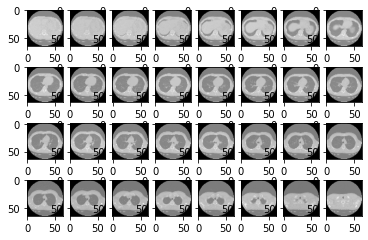

119 3
119 7
119 11
119 14
119 18
119 22
119 26
119 29
119 33
119 37
119 40
119 44
119 48
119 52
119 55
119 59
119 63
119 66
119 70
119 74
119 78
119 81
119 85
119 89
119 92
119 96
119 100
119 104
119 107
119 111
119 115
119 119
(32, 64, 64)


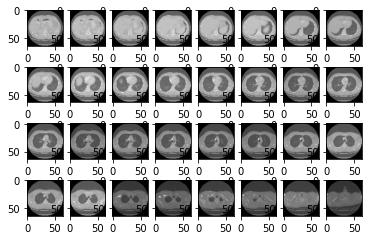

161 5
161 10
161 15
161 20
161 25
161 30
161 35
161 40
161 45
161 50
161 55
161 60
161 65
161 70
161 75
161 80
161 85
161 90
161 95
161 100
161 105
161 110
161 115
161 120
161 125
161 130
161 135
161 140
161 145
161 150
161 155
161 161
(32, 64, 64)


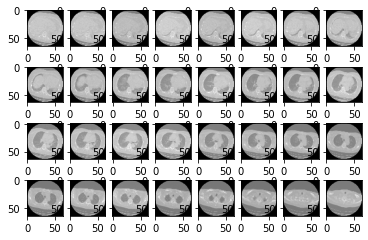

538 16
538 33
538 50
538 67
538 84
538 100
538 117
538 134
538 151
538 168
538 184
538 201
538 218
538 235
538 252
538 269
538 285
538 302
538 319
538 336
538 353
538 369
538 386
538 403
538 420
538 437
538 453
538 470
538 487
538 504
538 521
538 538
(32, 64, 64)


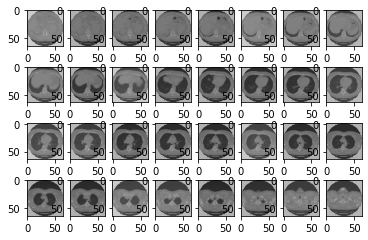

124 3
124 7
124 11
124 15
124 19
124 23
124 27
124 31
124 34
124 38
124 42
124 46
124 50
124 54
124 58
124 62
124 65
124 69
124 73
124 77
124 81
124 85
124 89
124 93
124 96
124 100
124 104
124 108
124 112
124 116
124 120
124 124
(32, 64, 64)


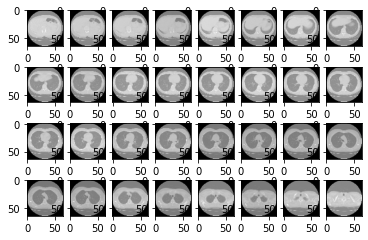

195 6
195 12
195 18
195 24
195 30
195 36
195 42
195 48
195 54
195 60
195 67
195 73
195 79
195 85
195 91
195 97
195 103
195 109
195 115
195 121
195 127
195 134
195 140
195 146
195 152
195 158
195 164
195 170
195 176
195 182
195 188
195 195
(32, 64, 64)


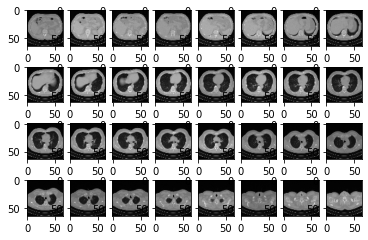

133 4
133 8
133 12
133 16
133 20
133 24
133 29
133 33
133 37
133 41
133 45
133 49
133 54
133 58
133 62
133 66
133 70
133 74
133 78
133 83
133 87
133 91
133 95
133 99
133 103
133 108
133 112
133 116
133 120
133 124
133 128
133 133
(32, 64, 64)


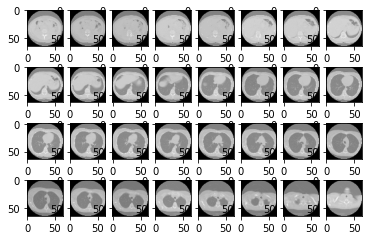

672 21
672 42
672 63
672 84
672 105
672 126
672 147
672 168
672 189
672 210
672 231
672 252
672 273
672 294
672 315
672 336
672 357
672 378
672 399
672 420
672 441
672 462
672 483
672 504
672 525
672 546
672 567
672 588
672 609
672 630
672 651
672 672
(32, 64, 64)


KeyboardInterrupt: 

In [102]:
for image_path in images[:20]:
    new_slices = []
    scan = load_image(image_path)
    
    slices = [cv2.resize(image,(IMG_SIZE,IMG_SIZE)) for image in scan]
    
    chuck_size = len(slices) / DATA_DEPTH
    for slice_chunk in chunks(slices,chuck_size):
    
        slice_chunk = list(map(mean,zip(*slice_chunk)))
        new_slices.append(slice_chunk)
    
    print(np.shape(new_slices))
    draw_slices(new_slices)

In [97]:
def draw_slices(slices):
    fig = plt.figure()
    
    for i,testSlice in enumerate(slices):
        subplot = fig.add_subplot(PLT_HEIGHT,PLT_WIDTH,i+1)
        subplot.imshow(testSlice, cmap='gray')
    plt.show()